Пособие (базовая модель)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

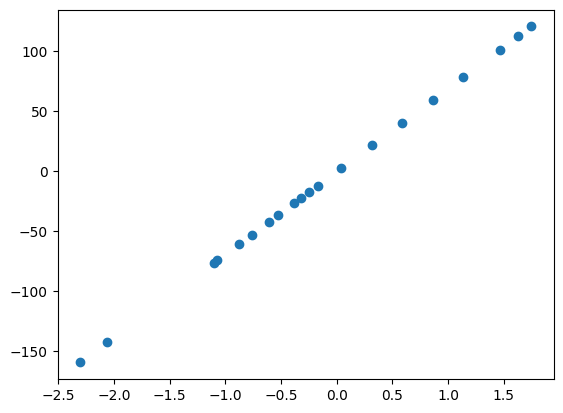

In [3]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [4]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [5]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.776975306057215e-06


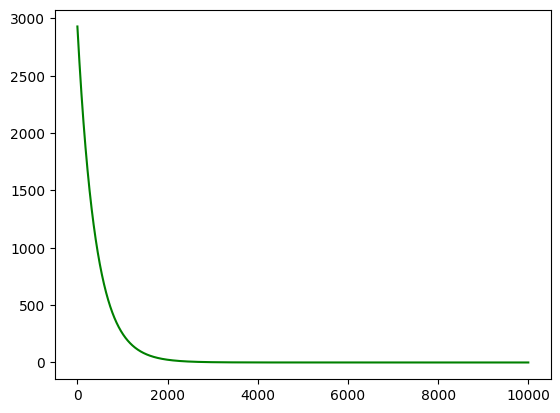

In [6]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

In [8]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [9]:
%time
n = 10
e = []
for i in range(n):
  b0 = np.random.normal(0,1000)
  b1 = np.random.normal(0,1000)
  hyp = Model(b0 = b0, b1 = b1)
  steps, errors = hyp.fit(x, y)
  J = hyp.error(x, y)
  e.append(J)
  print(f"{i+1} iteration: b0 = {b0}, b1 = {b1}. Error after gradient descent: {J}")
e = np.array(e)
print(f'МО: {e.mean()}, СКО: {e.std()} ')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
1 iteration: b0 = 468.3709012686258, b1 = 1948.7754995210323. Error after gradient descent: 0.004840779706457309
2 iteration: b0 = -112.16206842310363, b1 = 1113.5270925901486. Error after gradient descent: 0.0003743941390943638
3 iteration: b0 = 195.3560626410484, b1 = -1659.8442362356586. Error after gradient descent: 0.0009945309931385308
4 iteration: b0 = -793.502366351156, b1 = 165.94562456456742. Error after gradient descent: 0.0015186756518137021
5 iteration: b0 = 672.4466391584033, b1 = -1284.6521474103938. Error after gradient descent: 1.5339813587167007e-05
6 iteration: b0 = -920.3428452202211, b1 = -1337.5887728251705. Error after gradient descent: 0.006673152630906608
7 iteration: b0 = -820.8087691767829, b1 = 951.6651449651853. Error after gradient descent: 0.00046805214839554753
8 iteration: b0 = 173.6837039168833, b1 = 13.618490563613777. Error after gradient descent: 5.938137107036744e-05
9 iteration: b0 = 

2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs
******************************
Learning rate 1e-09
First 5 error after gradient descent: [2937.644602219114, 2937.644594922889, 2937.644587626663, 2937.6445803304387, 2937.644573034213]
Last 5 error after gradient descent: [2937.571677360266, 2937.5716700642242, 2937.5716627681813, 2937.571655472139, 2937.571648176097]
******************************
******************************
Learning rate 1e-06
First 5 error after gradient descent: [2937.637313294546, 2937.6300170920404, 2937.622720907826, 2937.6154247419013, 2937.6081285942646]
Last 5 error after gradient descent: [2865.617599148106, 2865.610483461165, 2865.603367792058, 2865.596252140784, 2865.5891365073458]
******************************
******************************
Learning rate 0.001
First 5 error after gradient descent: [2930.352956509933, 2923.079569868531, 2915.8244035059333, 2908.5874114538433, 2901.368547860564]
Last 5 error after gradient descent: [2.7979

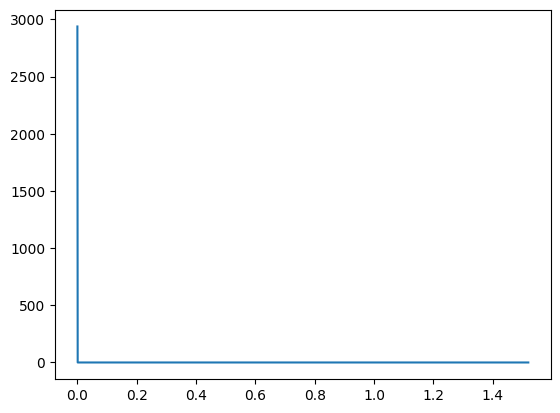

In [10]:
%time
alpha = [0.000000001, 0.000001, 0.001, 0.01, 0.1, 0.25, 0.5, 1, 1.25, 1.5, 1.52]
er = []
for lr in alpha:
  hyp = Model()
  steps, errors = hyp.fit(x, y, alpha = lr)
  J = hyp.error(x, y)
  er.append(J)
  print('*'*30)
  print(f"Learning rate {lr}")
  print(f"First 5 error after gradient descent: {errors[:5]}")
  print(f"Last 5 error after gradient descent: {errors[-5:]}")
  print('*'*30)
plt.plot(alpha, er)

3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

In [11]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X = np.zeros(10), df = pd.DataFrame()):
        X = X
        if len(df.columns) == 2:
          X = df.iloc[:,0]
        return self.b0 + self.b1 * X
    def error(self, X = np.zeros(10), Y = np.zeros(10), df = pd.DataFrame()):
        X = X
        Y = Y
        if len(df.columns) == 2:
          X = df.iloc[:,0]
          Y = df.iloc[:,1]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X = np.zeros(10), Y = np.zeros(10), df = pd.DataFrame(), alpha=0.001, accuracy=0.01, max_steps=5000):
        X = X
        Y = Y
        if len(df.columns) == 2:
          X = df.iloc[:,0]
          Y = df.iloc[:,1]
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [12]:
a = 1
b = 0.1
df = pd.DataFrame({'x': np.linspace(-2,4,20), 'y': a * np.linspace(-2,4,20) + b + np.random.normal(0,0.1,20)})
hyp = Model()
steps1, errors1 = hyp.fit(df=df)
J1 = hyp.error(df = df)
print("error after gradient descent:", J1)
print("*"*100)
hyp2 = Model()
steps2, errors2 = hyp2.fit(df.iloc[:,0], df.iloc[:,1])
J2 = hyp.error(df.iloc[:,0], df.iloc[:,1])
print("error after gradient descent:", J2)

error after gradient descent: 0.0035634712338629593
****************************************************************************************************
error after gradient descent: 0.0035634712338629593


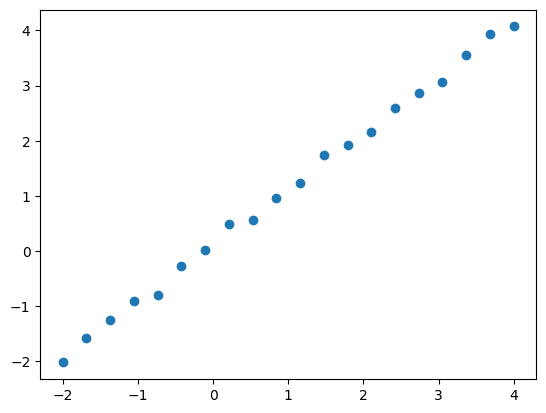

In [13]:
plt.scatter(df.x, df.y)

4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [14]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1
    def predict(self, X = np.zeros(10), df = pd.DataFrame()):
        X = X
        if len(df.columns) == 2:
          X = df.iloc[:,0]
        return self.b0 + self.b1 * X
    def error(self, X = np.zeros(10), Y = np.zeros(10), df = pd.DataFrame()):
        X = X
        Y = Y
        if len(df.columns) == 2:
          X = df.iloc[:,0]
          Y = df.iloc[:,1]
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X = np.zeros(10), Y = np.zeros(10), df = pd.DataFrame(), alpha=0.001, accuracy=0.000001, max_steps=5000):
        X = X
        Y = Y
        if len(df.columns) == 2:
          X = df.iloc[:,0]
          Y = df.iloc[:,1]
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            if len(errors) > 1:
              delta = new_err - errors[-1]
              if (delta < 0 and abs(delta)<accuracy) or delta > 0:
                break
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [15]:
a = 1
b = 0.1
df = pd.DataFrame({'x': np.linspace(-2,4,20), 'y': a * np.linspace(-2,4,20) + b + np.random.normal(0,0.1,20)})
hyp = Model()
steps1, errors1 = hyp.fit(df=df, accuracy = 0.000000001)
J1 = hyp.error(df = df)
print("error after gradient descent:", J1)
print("Обучение остановлено на итерации: ", len(steps1))
print("*"*100)
hyp2 = Model()
steps2, errors2 = hyp2.fit(df.iloc[:,0], df.iloc[:,1], accuracy = 0.000001)
J2 = hyp.error(df.iloc[:,0], df.iloc[:,1])
print("error after gradient descent:", J2)
print("Обучение остановлено на итерации: ", len(steps2))

error after gradient descent: 0.0044238788959831046
Обучение остановлено на итерации:  5000
****************************************************************************************************
error after gradient descent: 0.0044238788959831046
Обучение остановлено на итерации:  1540
